# YouTube_Ranking시각화

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [1]:
# 한글 폰트 사용을 위한 설정
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [2]:
# 파일 업로드
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving YouTube_rank.csv to YouTube_rank.csv


In [3]:
df = pd.read_csv(filename)
df.head()

,카테고리,채널명,구독자수,조회수,영상수
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579"
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729"
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223


In [4]:
# 구독자수(문자열) --> 구독자수2(정수)
df['구독자수2'] = df.구독자수.apply(lambda x: int(x.replace(',','')))
df.head()

,카테고리,채널명,구독자수,조회수,영상수,구독자수2
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,64000000
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,60300000
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",28500000
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000


In [5]:
def str2int(x):
    return int(x.replace(',',''))

In [7]:
df['영상수2'] = df.영상수.apply(str2int)
df.head()

,카테고리,채널명,구독자수,조회수,영상수,구독자수2,영상수2
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,64000000,371
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,60300000,654
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000,1579
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",28500000,3729
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000,223


In [8]:
df.sort_values(by='영상수2', ascending=False).head(10)

,카테고리,채널명,구독자수,조회수,영상수,구독자수2,영상수2
154,뉴스/정치/사회,YTN news,"2,500,000","5,462,390,000","553,462",2500000,553462
706,뉴스/정치/사회,연합뉴스TV,"700,000","918,130,000","362,555",700000,362555
59,TV/방송,SBS Drama,"5,480,000","5,750,870,000","340,878",5480000,340878
56,TV/방송,SBS Entertainment,"5,720,000","6,664,750,000","216,725",5720000,216725
337,뉴스/정치/사회,KBS News,"1,320,000","1,844,530,000","176,159",1320000,176159
973,뉴스/정치/사회,Arirang News,"530,000","237,210,000","123,886",530000,123886
243,뉴스/정치/사회,JTBC News,"1,710,000","2,399,540,000","116,376",1710000,116376
290,뉴스/정치/사회,MBCNEWS,"1,500,000","3,383,580,000","115,414",1500000,115414
112,TV/방송,KBS Drama,"3,470,000","4,261,110,000","114,095",3470000,114095
230,뉴스/정치/사회,SBS 뉴스,"1,780,000","2,672,520,000","111,308",1780000,111308


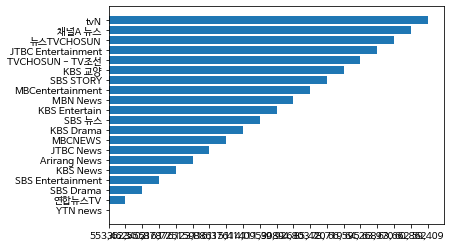

In [9]:
df2 = df.sort_values(by='영상수2', ascending=False).head(20)

plt.barh(df2['채널명'], df2['영상수'])
plt.show()

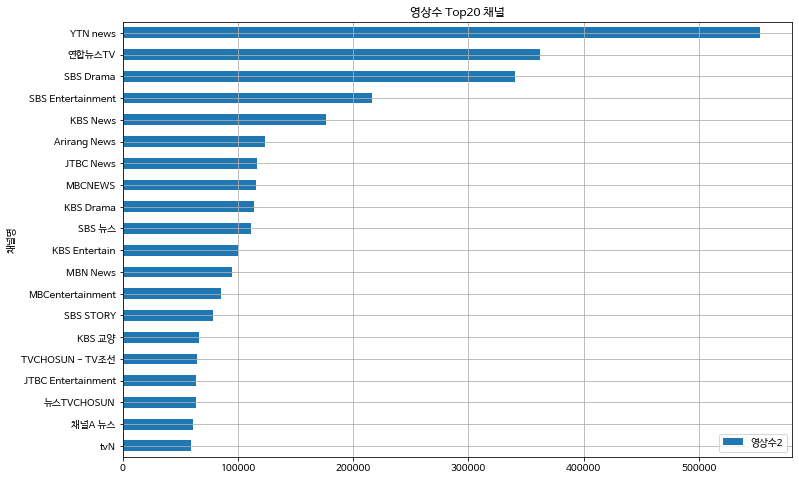

In [10]:
df2 = df[['채널명', '영상수2']].sort_values(by='영상수2', ascending=False)
df2.set_index('채널명', inplace=True)
df2.head(20).sort_values(by='영상수2').plot(kind='barh', grid=True, figsize=(12,8))
plt.title('영상수 Top20 채널')
plt.show()

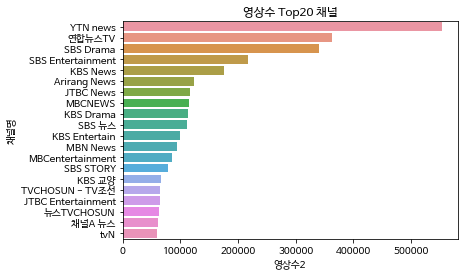

In [11]:
import seaborn as sns
df2 = df[['채널명', '영상수2']].sort_values(by='영상수2', ascending=False)
sns.barplot(y='채널명', x='영상수2', data=df2.head(20))
plt.title('영상수 Top20 채널')
plt.show()